                                                            CourseName  \
0                                            Английский язык для детей   
1                                         Киноклуб на английском языке   
2                                            Цигун на открытом воздухе   
3                               Мастер-классы по парным танцам на льду   
4                                    Мастерские театрального художника   
..                                                                 ...   
184  Новогодняя научно-просветительская программа «Фото в синих тонах»   
185                                        Детская школа бега на лыжах   
186                                            Школа фигурного катания   
187                                            Школа фигурного катания   
188                                            Школа фигурного катания   

                                   CoursesTimetable  \
0             Воскресенье, 16:00–17:00, 17:00–18:00   
1

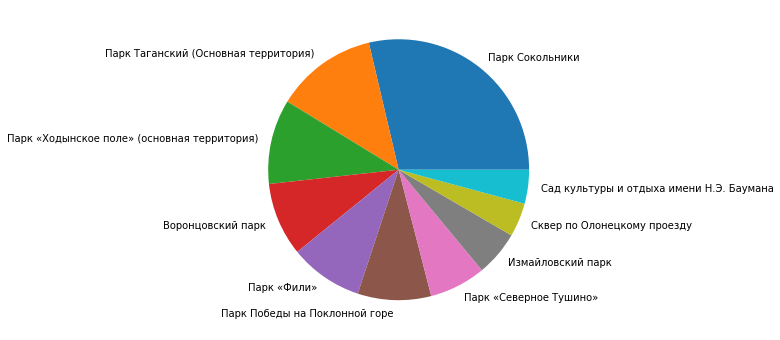

In [8]:
'''
Задание 15. Многостраничный отчёт
Используя данные по активностям в парках Москвы
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json

Создайте PDF отчёт, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ 10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк
Сколько активностей Тайцзицюань есть в парках Москвы?
'''

import requests # Импортирование библиотеки Requests
import json # Импортирование библиотеки Json
import pandas as pd # Импортирование библиотеки Pandas
import matplotlib.pyplot as plt # Импортирование библиотеки Matplotlib
from io import BytesIO # # Импортирование библиотеки BytesIO
import binascii # Импортирование библиотеки Binascii
import pdfkit # Импортирование библиотеки Pdfkit

r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json") 
# Загрузка данных
data = pd.DataFrame(json.loads(r.content), columns=["CourseName", "CoursesTimetable", "NameOfPark"]) 
# Формирование набора данных Pandas только из колонок “CourseName”, “CoursesTimetable”, "NameOfPark".
print (data) # Вывод данных Pandas из переменной data
print ("-----------------------------------------------------------------------------------------------------")
# Вывод разделяющей строки для лучшего восприятия данных
data["NameOfPark"] = data["NameOfPark"].apply(lambda x: x["value"]) 
# Извлечение название парка из комбинированной серии с помощью лямбда функции,
# получение значения “value” у словаря.
data.columns = ["Активность", "Расписание", "Парк"] # Переименование колонки для отчёта 
print ("Тайцзицюань: ", data[data["Активность"].str.contains("Тайцзицюань")]["Активность"].count())
# Нахождение активности "Тайцзицюань" и вывод числа записей с этой активностью
# Формирование диаграммы активности по паркам:
fig = plt.figure(figsize=(12,6)) # Создание холста с его размерами  
area = fig.add_subplot(1,1,1) # Создание подобласти
parks = data.groupby("Парк").count().sort_values("Активность", ascending=False) 
# Группировка данных по парку, сортировка в порядке убывания для взятия первых 20-ти значений - самые активные парки
parks.head(10)["Активность"].plot.pie(ax=area, label="") # Нанесение "Активности" на круговую диаграмму 
img = BytesIO() 
# Использование объекта BytesIO для временного хранения бинарных данных изображения и их дальнейшие преобразование в base64 формат
plt.savefig(img) # Сохранение изображения
img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(), newline=False).decode("UTF-8") 
# преобразование бинарных данных к base64 формату
pd.set_option('display.max_colwidth', 1000) 
# Настройка set_option для вывода всех символов без обрезки по умолчанию расписания Активности в парке в html-таблице
html = '''<html>
<head>
    <title>Активности в парках Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Активности в парках Москвы</h1>
    <img src="''' + img + '''" alt="Популярные парки"/>
    ''' + data.to_html(index=False) + '''
</body>
</html>''' # Формирование html отчёта для финального отчёта 
config = pdfkit.configuration(wkhtmltopdf='C:\\Program Files\\wkhtmltopdf\\bin\\wkhtmltopdf.exe')
# Создание Pdf из html-строки, используя Pdfkit
options = {
    'page-size': 'A4', # установка размера страницы
    'header-right': '[page]' # установка номера страницы и её расположения
}
pdfkit.from_string(html, 'C:\\Users\\Roman\\Downloads\\parks.pdf', configuration=config, options=options) 
# Создание файла "parks.pdf"
with open("C:\\Users\\Roman\\Downloads\\parks.html", "w", encoding="utf-8") as file:
    file.write(html) # Создание файла "parks.html"

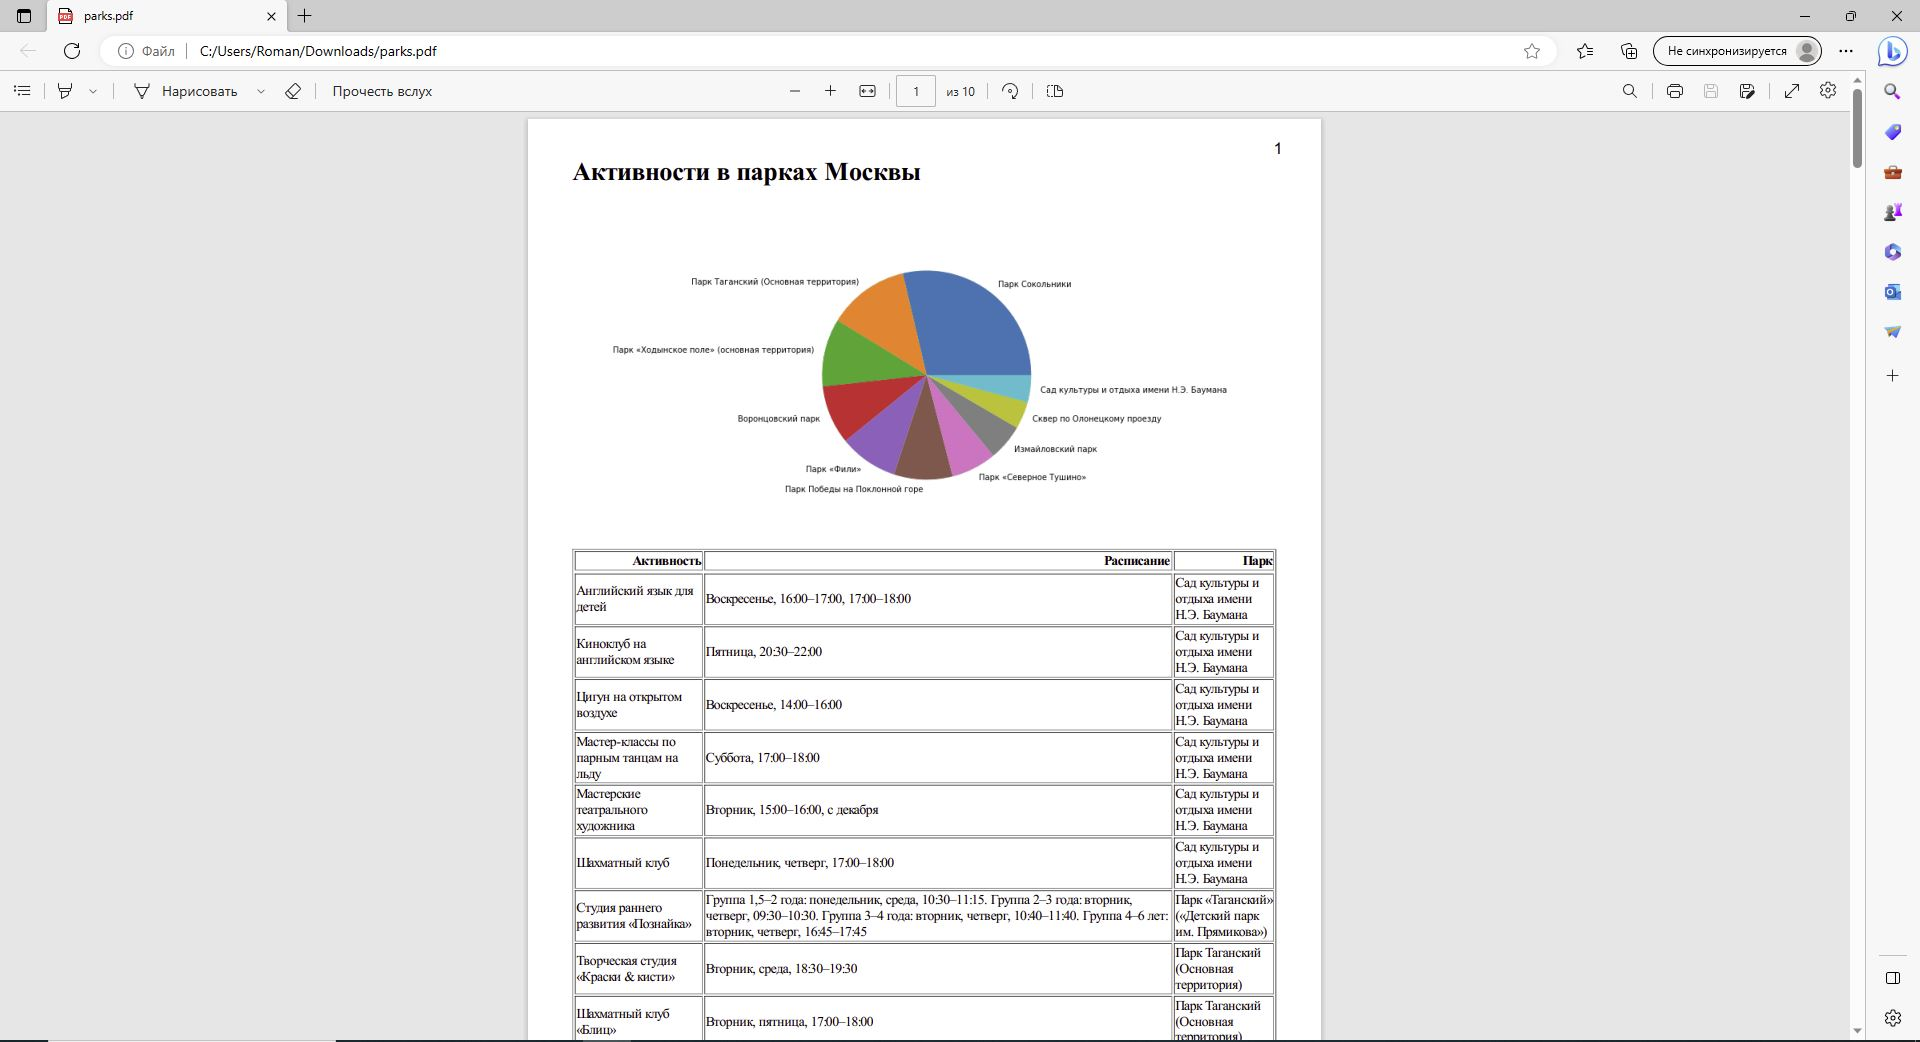

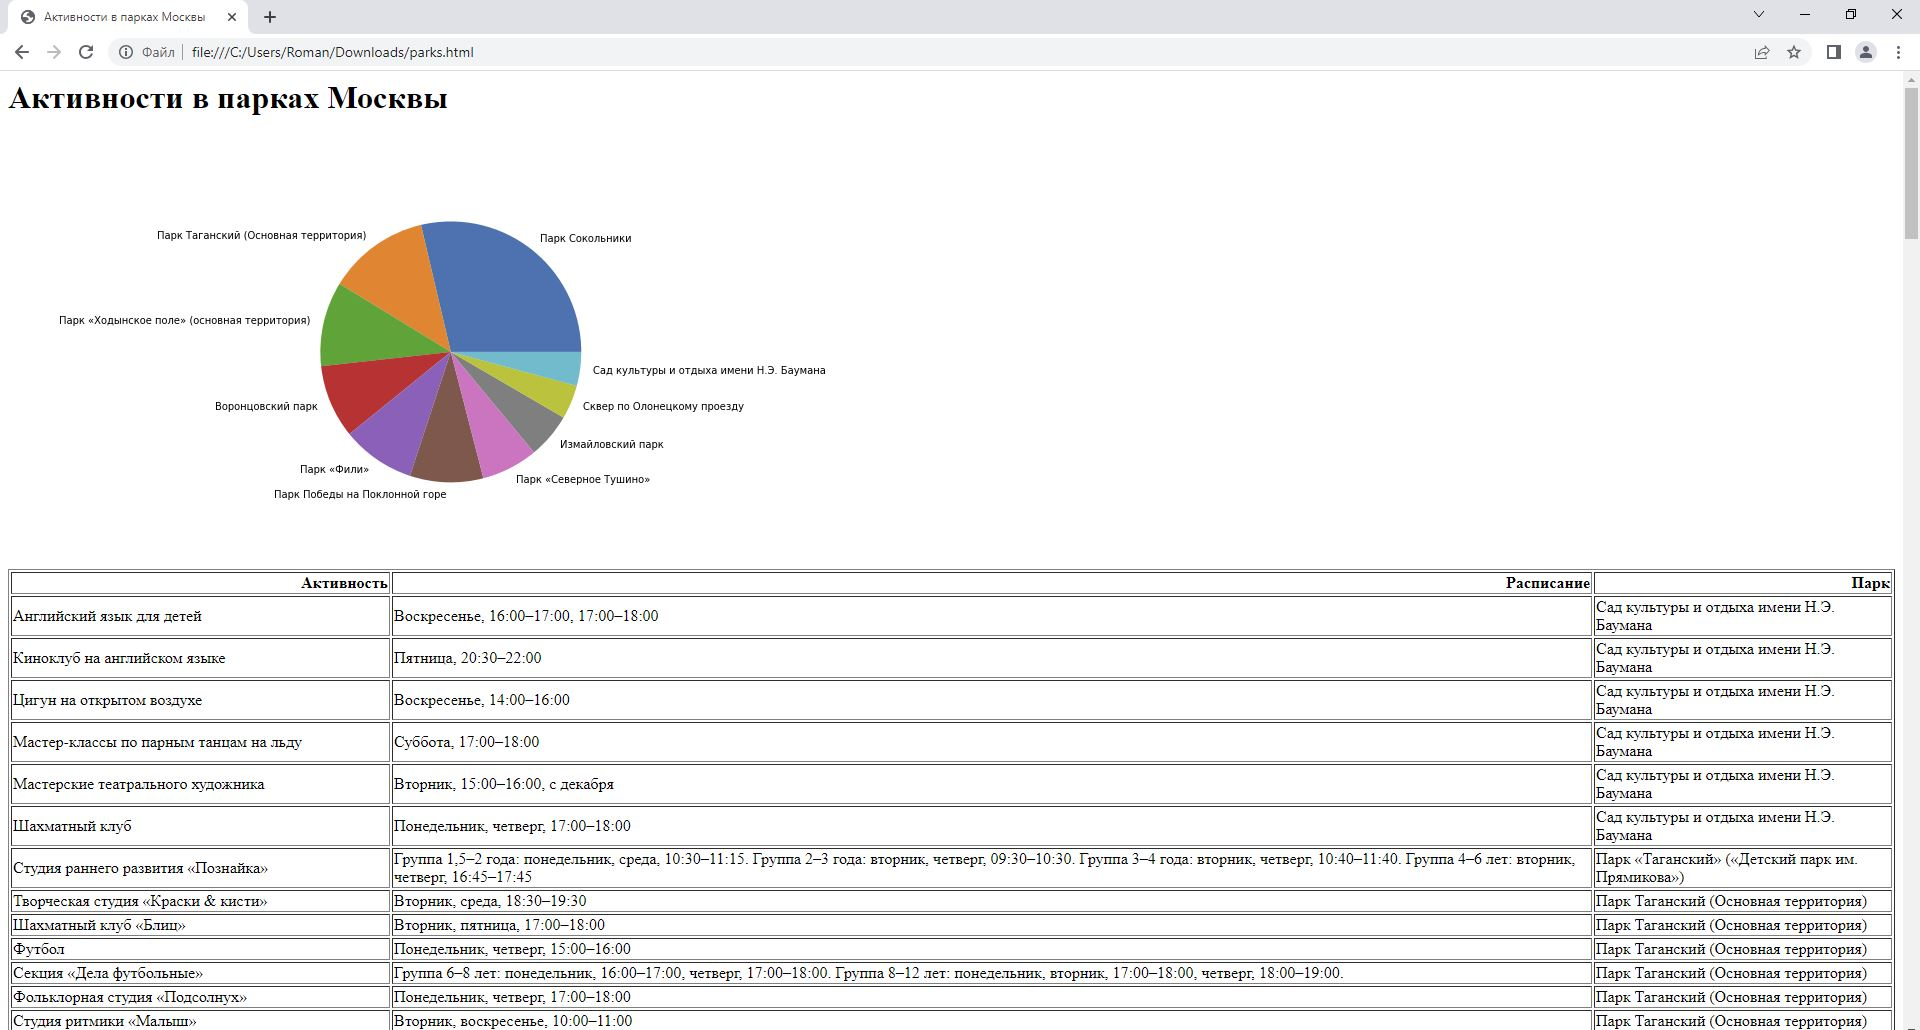